# 과제 1 - SVM 회귀


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

In [75]:
# 데이터 로드
california_housing = fetch_california_housing(as_frame=True)
X, y = california_housing.data, california_housing.target

# 위, 경도 데이터 열 삭제
X = X.drop('Latitude', axis = 1)
X = X.drop('Longitude', axis = 1)

# 데이터 스케일
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [76]:
# 모델 생성
svr = SVR(epsilon = 0.01)

# 모델 훈련
svr.fit(X_train, y_train)


SVR(epsilon=0.01)

In [77]:
# 예측
y_pred_scaled = svr.predict(X_test)

# 스케일 복원
y_test = scaler_y.inverse_transform(y_test.reshape(-1,1))
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.45835891638101384
R-squared: 0.650216898699582


In [78]:
print(y_pred)

[[0.75859982]
 [1.36685297]
 [3.78972841]
 ...
 [4.62704727]
 [1.07361099]
 [1.75725154]]


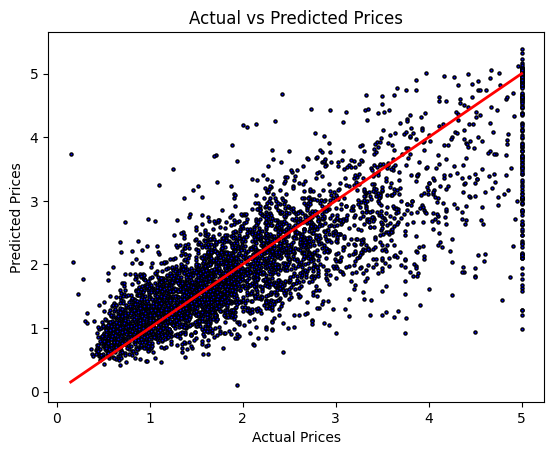

In [79]:
# 일부 feature를 사용하여 2D로 시각화
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', s=5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


## 과제 1-1 : epsilon 값을 변경하면서 LinearSVR을 적합한 후, 결과를 확인하고 이유를 분석해주세요!

성능 평가 후 평가지표와 그래프를 사용해서 분석해주세요

In [ ]:
# 모델 생성
your_svr = SVR() # Todo


# 모델 훈련
your_svr.fit(X_train, y_train)


LinearSVR()

In [ ]:
# Todo

# 과제 1-2 : SVM 분류

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')

In [82]:
# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 과제 1 - 2 trade-off 파라미터 C 값 설정

아래 수식처럼 C가 동작하는데, C가 작을수록 에러가 생겨도 가중치가 작기에 오버피팅을 막을 수 있음.

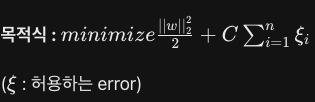


In [86]:
# 다양한 trade-off 파라미터 C 값 설정
C_values = [0.1, , , , , , , ,] # Todo
train_accuracies = []
test_accuracies = []

for C in C_values:
    # 모델 생성
    svc = LinearSVC(C=C)

    # 모델 훈련
    svc.fit(X_train, y_train)

    # 훈련 데이터와 테스트 데이터에 대한 예측
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)

    # 정확도 계산
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # 결과 저장
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # 성능 출력
    print(f"C={C}:")
    print(f"Training Accuracy: {train_acc}")
    print(f"Testing Accuracy: {test_acc}")
    print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")
    print("-" * 50)


SyntaxError: invalid syntax (<ipython-input-86-e0d64406283e>, line 2)

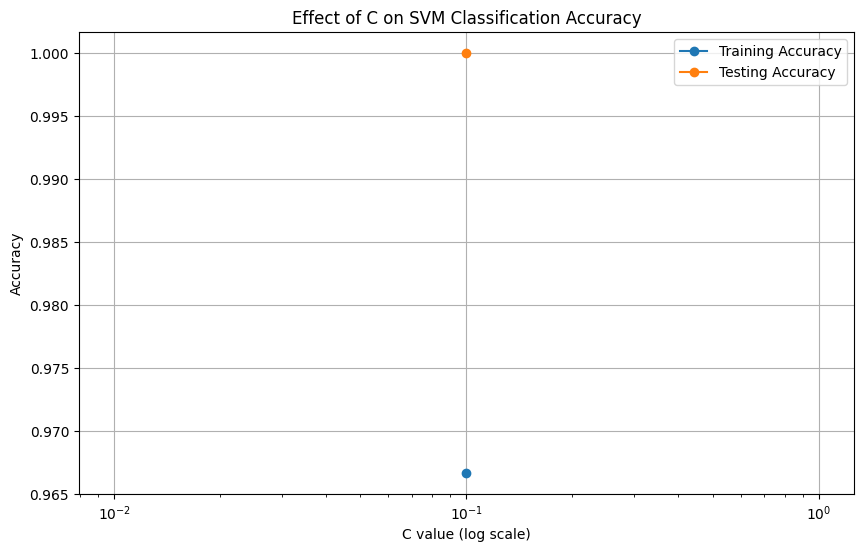

In [87]:
# C 값에 따른 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(C_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVM Classification Accuracy')
plt.legend()
plt.grid(True)
plt.show()
